# CAMB and HEALpy examples

This notebook is intended to help start CAMB and Healpy.

For more information on CAMB, see the official Document:
<br>
https://camb.readthedocs.io/en/latest/
<br>
as well as the demo file:
<br>
https://camb.readthedocs.io/en/latest/CAMBdemo.html

For more information about Healpy, see the official Document:
https://healpy.readthedocs.io/en/latest/index.html

The focus of this document is to highlight the dark-energy effect on the CMB power spectrum.

4 July 2024<br>
Donghui Jeong

In [1]:
import sys, os

import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
import camb
from camb import model, initialpower

In [4]:
import healpy as hp

<Figure size 1200x600 with 0 Axes>

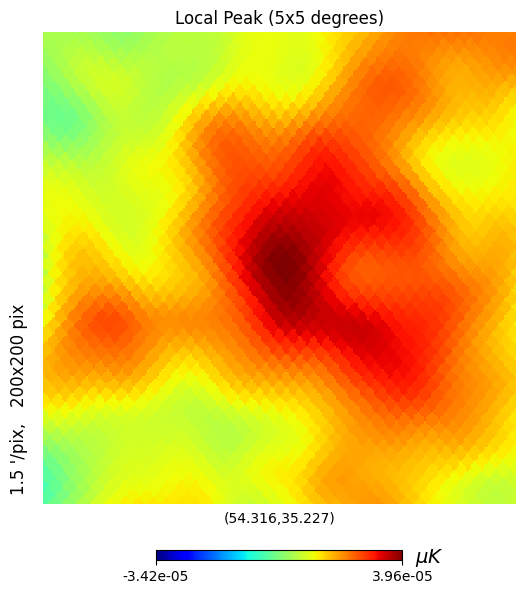

In [6]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# CMB 파워 스펙트럼 예제 (이 데이터를 실제 파워 스펙트럼 데이터로 대체)
ell_max = 2000
cls = np.zeros(ell_max + 1)
cls[2:] = 1e-10 / np.arange(2, ell_max + 1) / (np.arange(2, ell_max + 1) + 1)

# 주어진 파워 스펙트럼으로부터 CMB 지도 생성
nside = 512  # 해상도를 지정합니다 (2의 제곱수로 지정)
cmb_map = hp.synfast(cls, nside, lmax=ell_max, mmax=ell_max, pixwin=False)

# 0.5도 크기의 Gaussian 필터 적용
fwhm = 0.5 * (np.pi / 180.0)  # FWHM을 라디안 단위로 변환
smoothed_map = hp.smoothing(cmb_map, fwhm=fwhm)

# 국소적으로 온도가 가장 높은 곳 찾기
max_idx = np.argmax(smoothed_map)
max_ra, max_dec = hp.pix2ang(nside, max_idx, lonlat=True)

# 중심 좌표에서 5도 x 5도 영역 추출
width_deg = 5
height_deg = 5

# 주변 픽셀 찾기
vec = hp.ang2vec(max_ra, max_dec, lonlat=True)
radius = np.sqrt((width_deg / 2) ** 2 + (height_deg / 2) ** 2) * (
    np.pi / 180.0
)  # 라디안으로 변환
neighbor_indices = hp.query_disc(nside, vec, radius)

# 지도에서 해당 영역 추출
sub_map = np.full(hp.nside2npix(nside), hp.UNSEEN)
sub_map[neighbor_indices] = smoothed_map[neighbor_indices]

# 결과 시각화
plt.figure(figsize=(12, 6))
hp.gnomview(
    sub_map,
    rot=(max_ra, max_dec),
    xsize=200,
    cmap="jet",
    reso=width_deg * 60 / 200,
    title="Local Peak (5x5 degrees)",
    min=smoothed_map.min(),
    max=smoothed_map.max(),
    unit="$\mu K$",
)

plt.show()

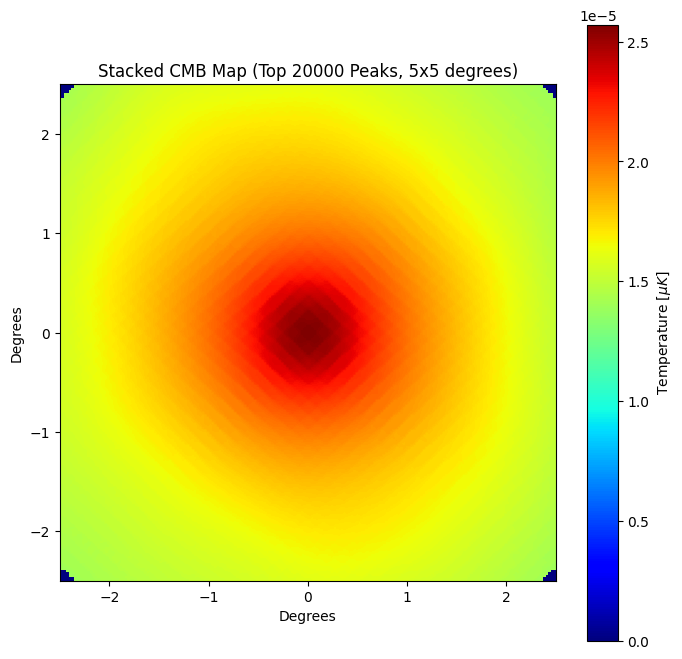

In [33]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# CMB 파워 스펙트럼 예제 (이 데이터를 실제 파워 스펙트럼 데이터로 대체)
ell_max = 2000
cls = np.zeros(ell_max + 1)
cls[2:] = 1e-10 / np.arange(2, ell_max + 1) / (np.arange(2, ell_max + 1) + 1)

# 주어진 파워 스펙트럼으로부터 CMB 지도 생성
nside = 512  # 해상도를 지정합니다 (2의 제곱수로 지정)
cmb_map = hp.synfast(cls, nside, lmax=ell_max, mmax=ell_max, pixwin=False)

# 0.5도 크기의 Gaussian 필터 적용
fwhm = 0.5 * (np.pi / 180.0)  # FWHM을 라디안 단위로 변환
smoothed_map = hp.smoothing(cmb_map, fwhm=fwhm)

# 온도가 높은 순으로 2만개의 픽셀 찾기
top_n = 20000
sorted_indices = np.argsort(smoothed_map)[-top_n:]

# 5도 x 5도 영역의 반지름 (라디안 단위)
width_deg = 5
height_deg = 5
radius = np.sqrt((width_deg / 2) ** 2 + (height_deg / 2) ** 2) * (np.pi / 180.0)

# 추출된 영역을 누적할 배열 초기화
stacked_map = np.zeros((200, 200))  # xsize와 동일하게 설정

for idx in sorted_indices:
    ra, dec = hp.pix2ang(nside, idx, lonlat=True)
    vec = hp.ang2vec(ra, dec, lonlat=True)
    neighbor_indices = hp.query_disc(nside, vec, radius)

    sub_map = np.full(hp.nside2npix(nside), hp.UNSEEN)
    sub_map[neighbor_indices] = smoothed_map[neighbor_indices]

    gnomview_map = hp.gnomview(
        sub_map,
        rot=(ra, dec),
        xsize=200,
        reso=width_deg * 60 / 200,
        return_projected_map=True,
        no_plot=True,
    )

    stacked_map += gnomview_map

# 평균 지도 계산
stacked_map /= top_n

# 결과 시각화
plt.figure(figsize=(8, 8))
plt.imshow(
    stacked_map,
    extent=(-width_deg / 2, width_deg / 2, -height_deg / 2, height_deg / 2),
    cmap="jet",
    vmin=0,
)
plt.colorbar(label="Temperature [$\mu K$]")
plt.title("Stacked CMB Map (Top 20000 Peaks, 5x5 degrees)")
plt.xlabel("Degrees")
plt.ylabel("Degrees")
plt.show()

<Figure size 1200x600 with 0 Axes>

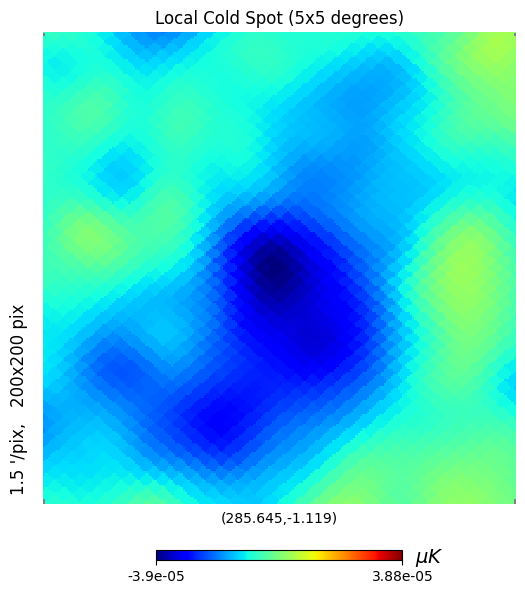

In [8]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# CMB 파워 스펙트럼 예제 (이 데이터를 실제 파워 스펙트럼 데이터로 대체)
ell_max = 2000
cls = np.zeros(ell_max + 1)
cls[2:] = 1e-10 / np.arange(2, ell_max + 1) / (np.arange(2, ell_max + 1) + 1)

# 주어진 파워 스펙트럼으로부터 CMB 지도 생성
nside = 512  # 해상도를 지정합니다 (2의 제곱수로 지정)
cmb_map = hp.synfast(cls, nside, lmax=ell_max, mmax=ell_max, pixwin=False)

# 0.5도 크기의 Gaussian 필터 적용
fwhm = 0.5 * (np.pi / 180.0)  # FWHM을 라디안 단위로 변환
smoothed_map = hp.smoothing(cmb_map, fwhm=fwhm)

# 국소적으로 온도가 가장 낮은 곳 찾기
min_idx = np.argmin(smoothed_map)
min_ra, min_dec = hp.pix2ang(nside, min_idx, lonlat=True)

# 중심 좌표에서 5도 x 5도 영역 추출
width_deg = 5
height_deg = 5

# 주변 픽셀 찾기
vec = hp.ang2vec(min_ra, min_dec, lonlat=True)
radius = np.sqrt((width_deg / 2) ** 2 + (height_deg / 2) ** 2) * (
    np.pi / 180.0
)  # 라디안으로 변환
neighbor_indices = hp.query_disc(nside, vec, radius)

# 지도에서 해당 영역 추출
sub_map = np.full(hp.nside2npix(nside), hp.UNSEEN)
sub_map[neighbor_indices] = smoothed_map[neighbor_indices]

# 결과 시각화
plt.figure(figsize=(12, 6))
hp.gnomview(
    sub_map,
    rot=(min_ra, min_dec),
    xsize=200,
    cmap="jet",
    reso=width_deg * 60 / 200,
    title="Local Cold Spot (5x5 degrees)",
    min=smoothed_map.min(),
    max=smoothed_map.max(),
    unit="$\mu K$",
)

plt.show()

---